## 1. Getting started

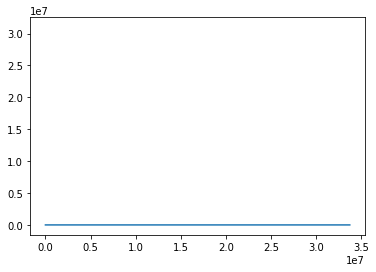

In [71]:
%matplotlib inline
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

#load dataset
mat_contents = scipy.io.loadmat("/afs/inf.ed.ac.uk/group/teaching/mlprdata/audio/amp_data.mat")
amp_data = mat_contents['amp_data']
#histogram
plt.plot(amp_data)
plt.show()
plt.hist(amp_data)
plt.show()
#reshape dataset
row_num = amp_data.shape[0]
remainder = row_num % 21;
amp_data = amp_data[0:(row_num-remainder)];
amp_data = amp_data.reshape((-1,21))

In [47]:
#shuffle rows of the matrix
np.random.seed(0)
rand_perm = np.random.permutation(amp_data.shape[0])
shuf_data = amp_data[rand_perm,:]
row_num = shuf_data.shape[0]
train = shuf_data[:round(row_num*0.7),:]
val = shuf_data[round(row_num*0.7):round(row_num*0.85),:]
test = shuf_data[round(row_num*0.85):,:]

X_shuf_train = train[:,:20];
y_shuf_train = train[:,20];
X_shuf_val = val[:,:20];
y_shuf_val = val[:,20];
X_shuf_test = test[:,:20];
y_shuf_test = test[:,20];

print(X_shuf_train.shape, y_shuf_train.shape)
print(X_shuf_val.shape, y_shuf_val.shape)
print(X_shuf_test.shape, y_shuf_test.shape)

(1123776, 20) (1123776,)
(240809, 20) (240809,)
(240809, 20) (240809,)


## 2. Curve fitting on a snippet of audio:

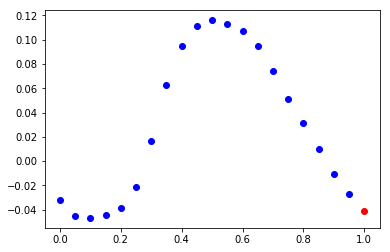

In [69]:
#plot dataset
x = X_shuf_train[0,:]
t = np.arange(0,1,1/20)
# print(x.shape)
# print(t.shape)
# print(amp_data.shape)
# print(amp_data)
plt.plot(t,x,'bo')
plt.plot(1,y_shuf_train[0],'ro')
plt.show()

## 3. Choosing a polynomial predictor based on performance

In [ ]:
order = 4

def ls(x,y):
    y=np.dot(x.T,y)
    y=np.reshape(y,(-1,1))
    xx=np.dot(x.T,x)
    xx=np.mat(xx)
    x=xx.I
    c=x*y
    print(c)
    return c

In [8]:
ls([[1]],[[1]])

AttributeError: 'list' object has no attribute 'T'